## CA 2 - Review of Agriculture in Ireland

### Machine Learning

### API for organic food ..

reference - https://agridata.ec.europa.eu/extensions/DataPortal/API_Documentation.html

https://agridata.ec.europa.eu/extensions/DataPortal/API_Documentation.html

###### Info Page
https://agridata.ec.europa.eu/Qlik_Downloads/Organic-Production-sources.htm


###### JSON and APIs with Python - 
https://towardsdatascience.com/json-and-apis-with-python-fba329ef6ef0


In [1]:
# libraries for graphics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# create tables
from tabulate import tabulate

#graphics for calculations
import numpy as np
import pandas as pd

#Libraries to work with json files
import requests
import json


import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

## Task 1 - Sentiment Analysis

Sentiment analysis was created using an API weblink to the Agridata webportal of the European Union.  The link is a live connection with updates replicated to the notebook as they are shared on the dashboard.

In [2]:
# setting up the HTTP request
# create a live api link to the Europa AgriFood Dashboard for live Raw Milk price updates

raw_milk_api = requests.get('https://ec.europa.eu/agrifood/api/rawMilk/prices?products=raw%20milk')

#egg_price_api = requests.get('https://ec.europa.eu/agrifood/api/poultry/egg/prices?farmingMethods=Barn,Cage')

In [3]:
# check the json data to make sure it's loaded in

#raw_milk_api.json()

In [4]:
# check data was loaded in successfully

raw_milk_api

<Response [200]>

In [5]:
# convert api json data into a dataframe for processing

df_milk_prices = pd.DataFrame.from_dict(raw_milk_api.json())

In [6]:
# show the dataframe

df_milk_prices.head()

,memberStateCode,memberStateName,beginDate,endDate,month,monthName,price,unit,year,product
0,AT,Austria,01/12/2022,31/12/2022,12,Dec,€59.20,100KG,2022,Raw milk
1,BE,Belgium,01/12/2022,31/12/2022,12,Dec,€59.82,100KG,2022,Raw milk
2,BG,Bulgaria,01/12/2022,31/12/2022,12,Dec,€51.51,100KG,2022,Raw milk
3,CY,Cyprus,01/12/2022,31/12/2022,12,Dec,€64.42,100KG,2022,Raw milk
4,CZ,Czechia,01/12/2022,31/12/2022,12,Dec,€51.70,100KG,2022,Raw milk


In [7]:
# remove the '€' from each row in the 'price' column

df_milk_prices['price'] = df_milk_prices['price'].str[1:]


In [8]:
# map all values in the 'unit' column as 100.  
# Prices are calcuated at 100kg

df_milk_prices['unit'] = df_milk_prices['unit'].replace('100KG', 100)

df_milk_prices.head()

,memberStateCode,memberStateName,beginDate,endDate,month,monthName,price,unit,year,product
0,AT,Austria,01/12/2022,31/12/2022,12,Dec,59.20,100,2022,Raw milk
1,BE,Belgium,01/12/2022,31/12/2022,12,Dec,59.82,100,2022,Raw milk
2,BG,Bulgaria,01/12/2022,31/12/2022,12,Dec,51.51,100,2022,Raw milk
3,CY,Cyprus,01/12/2022,31/12/2022,12,Dec,64.42,100,2022,Raw milk
4,CZ,Czechia,01/12/2022,31/12/2022,12,Dec,51.70,100,2022,Raw milk


In [9]:
# count unique 'memberStateName' values, grouped by year

#df_milk_prices.groupby('memberStateName')['year'].nunique()

In [10]:
# replace values to numeric

values_to_be_replaced = {
    'Austria':1,
    'Belgium':2,
    'Bulgaria':3,
    'Croatia':4,
    'Cyprus':5,
    'Czechia':6,
    'Denmark':7,
    'Estonia':8,
    'European Union':9,
    'European Union + UK':10,
    'Finland':11,
    'France':12,
    'Germany':13,
    'Greece':14,
    'Hungary':15,
    'Ireland':16,
    'Italy':17,
    'Latvia':18,
    'Lithuania':19,
    'Luxembourg':20,
    'Malta':21,
    'Netherlands':22,
    'Poland':23,
    'Portugal':24,
    'Romania':25,
    'Slovakia':26,
    'Slovenia':27,
    'Spain':28,
    'Sweden':29,
    'UK up to 01/02/2020':30,
     }

In [11]:
# add a new column based on the code in 'agriprod' column

df_milk_prices['memberStateName'] = df_milk_prices['memberStateName'].map(values_to_be_replaced)

df_milk_prices

,memberStateCode,memberStateName,beginDate,endDate,month,monthName,price,unit,year,product
0,AT,1,01/12/2022,31/12/2022,12,Dec,59.20,100,2022,Raw milk
1,BE,2,01/12/2022,31/12/2022,12,Dec,59.82,100,2022,Raw milk
2,BG,3,01/12/2022,31/12/2022,12,Dec,51.51,100,2022,Raw milk
3,CY,5,01/12/2022,31/12/2022,12,Dec,64.42,100,2022,Raw milk
4,CZ,6,01/12/2022,31/12/2022,12,Dec,51.70,100,2022,Raw milk
...,...,...,...,...,...,...,...,...,...,...
6788,EU+UK,10,01/03/1977,31/03/1977,3,Mar,18.08,100,1977,Raw milk
6789,EU-UK,9,01/02/1977,28/02/1977,2,Feb,19.05,100,1977,Raw milk
6790,EU+UK,10,01/02/1977,28/02/1977,2,Feb,18.36,100,1977,Raw milk
6791,EU-UK,9,01/01/1977,31/01/1977,1,Jan,19.25,100,1977,Raw milk


Text(0.5, 1.0, 'Histogram - data of milk prices against year')

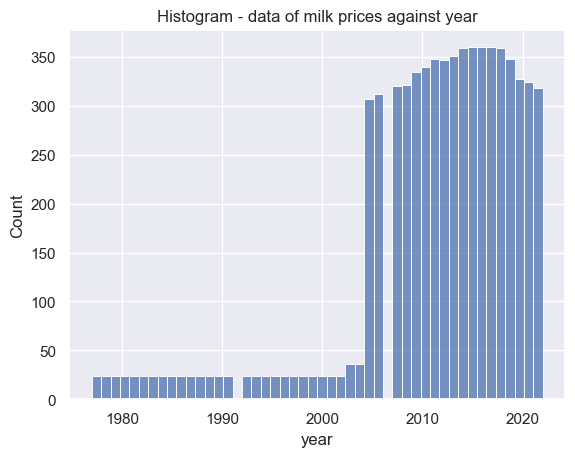

In [12]:
# Print a graphical view of the milk prices data frame 

sns.histplot(data=df_milk_prices, x="year")
plt.title("Histogram - data of milk prices against year")

#### Creat a new dataframe only displaying data from 2012 onwards


In [13]:
# filter on the data so only data after and including 2012 is used
# this mirrors the dataframe for EDA / Stats and Machine Learning

yr_2012_plus = df_milk_prices[df_milk_prices['year'] >= 2012]

yr_2012_plus.head()

,memberStateCode,memberStateName,beginDate,endDate,month,monthName,price,unit,year,product
0,AT,1,01/12/2022,31/12/2022,12,Dec,59.20,100,2022,Raw milk
1,BE,2,01/12/2022,31/12/2022,12,Dec,59.82,100,2022,Raw milk
2,BG,3,01/12/2022,31/12/2022,12,Dec,51.51,100,2022,Raw milk
3,CY,5,01/12/2022,31/12/2022,12,Dec,64.42,100,2022,Raw milk
4,CZ,6,01/12/2022,31/12/2022,12,Dec,51.70,100,2022,Raw milk


In [14]:
# save 'yr_2012_plus' data frame to a csv file 
# allow for reference to Data Visualisation file for dashboards.

yr_2012_plus.to_csv('Datasets/yr_2012_plus.csv')

In [15]:
# remove colunmns

yr_2012_plus.drop(['monthName','memberStateCode', 'beginDate', 'endDate', 'monthName', 'product'], axis = 1, inplace=True)

#yr_2012_plus.info()

In [16]:
# check for na's and drop accordingly

yr_2012_plus = yr_2012_plus.dropna()

In [17]:
# ensure a the datatypes are appropriate

yr_2012_plus['price'] = pd.to_numeric(yr_2012_plus['price'], errors = 'coerce')

In [18]:
yr_2012_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3814 entries, 0 to 3813
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   memberStateName  3814 non-null   int64  
 1   month            3814 non-null   int64  
 2   price            3814 non-null   float64
 3   unit             3814 non-null   int64  
 4   year             3814 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 178.8 KB


Text(0.5, 1.0, 'Plot of milk prices from 2012 by year')

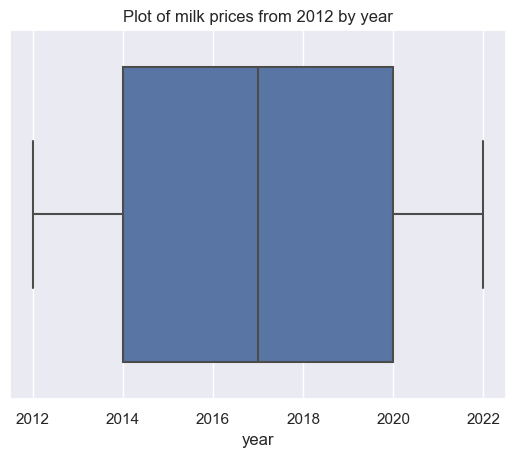

In [19]:
# view a graphical represenation of the price 

sns.boxplot(data=yr_2012_plus, x='year')
plt.title("Plot of milk prices from 2012 by year")

## Task 2 - Machine Learning


## GridsearchCV and Hyperparamaters

#### REFERENCE - 
1. https://realpython.com/learning-paths/machine-learning-python/
2. https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/
3. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#examples-using-sklearn-model-selection-gridsearchcv
4. https://realpython.com/build-recommendation-engine-collaborative-filtering/
5. https://medium.com/@Ambarish_224/hyperparameter-tuning-a-step-by-step-guide-for-machine-learning-practitioners-a0734f8a0869

In [20]:
# anamoly detection
from imblearn.over_sampling import SMOTE 


# sklearn libraries to complete the analysis
import sklearn as sk
import sklearn.linear_model as lm
import sklearn.neighbors as nei
import sklearn.model_selection as mod

# models and classifiers for Supervised Learning
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# import libariries for Hyperparam tuning and Grid Search CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# libraries for the confusion matrix
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import accuracy_score, confusion_matrix, recall_score


### Model 1 - Random Forest Classifier

In [21]:
# Step 2 - create the testing and training models to complete supervised learning 

# assign values for x and y from the start to the end of the df
X = yr_2012_plus.iloc[:, :-1].values
y = yr_2012_plus.iloc[:, -1].values

# spliting the dataframe into Test and Train data for Algorithm 1
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# spliting the dataframe into Test and Train data for Algorigthm 2
X_Train2, X_Test2, y_Train2, y_Test2 = train_test_split(X, y, test_size = 0.2, random_state = 10)

# spliting the dataframe into Test and Train data for Algortihm 3
X_Train3, X_Test3, y_Train3, y_Test3 = train_test_split(X, y, test_size = 0.2, random_state = 10)

# spliting the dataframe into Test and Train data for Algortihm 4
X_Train4, X_Test4, y_Train4, y_Test4 = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [22]:
# Step 1 - select a model to run the paramater tuning and GridsearchCV on

rfc_clf = RandomForestClassifier()

In [23]:
# Step 3 - define the Hyperparameters for use with Gridsearch CV

# specify range of hyperparameters to tune as part of the exercise

param_grid = [{
    'max_depth': list(range(10, 15)),
    #'max_features': list(range(0,14))
    'max_features': list(range(0,10))
    }]


In [24]:
#Step 4 - Complete the GridsearchCV

# Create a grid search object
grid_search = GridSearchCV(rfc_clf, param_grid, cv=5)

# Fit the grid search to the data including the classifer for Random Forest Classifer
grid_search.fit(X_Train, y_Train)

# Print the best hyperparameters
print(grid_search.param_grid)

[{'max_depth': [10, 11, 12, 13, 14], 'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]


In [25]:
# Predicting the result based on the test data

y_pred = grid_search.predict(X_Test)

#print(y_pred)

In [26]:
y_pred_train = grid_search.predict(X_Train)

#print(y_pred_train)

#### Confusion Matrix results

Help to check the accuracy of the classificaiton

In [27]:
cm_Train = confusion_matrix(y_pred_train, y_Train)

cm_Test = confusion_matrix(y_pred, y_Test)

NameError: name 'confusion_matrix' is not defined

In [ ]:
# print the Accuracy value of for test data 


rfclass_test = ((cm_Test[0][0] + cm_Test[1][1])/len(y_Test))

print('Accuracy for test set for Random Forest Classifier = {:.2%}'.format(rfclass_test))

In [ ]:
# print the Accuracy value of for training data 

rfclass_train = (cm_Train[0][0] + cm_Train[1][1])/len(y_Train)

print('Accuracy for training set for Logistic Regression = {:.2%}'.format(rfclass_train))

### Model 2 - Logistic Regression

Model is trained without GridSearch CV

In [ ]:
# creating a new classifer using logisticegression

logreg_clf = LogisticRegression()

In [ ]:
# training the classifier
# X_Train and y_Train values are created in the above cells

logreg_clf.fit(X_Train2, y_Train2)

In [ ]:
# Predicting the result based on the test data

y_pred = logreg_clf.predict(X_Test)

In [ ]:
# CONFUSION MATRIX ......to check the accuracy of the classification

y_pred_train2 = logreg_clf.predict(X_Train)

#print(y_pred_train)

In [ ]:
# print the Accuracy value of for test data 

logR_train = (cm_Train[0][0] + cm_Train[1][1])/len(y_Train)

print('Accuracy for training set for Logistic Regression = {:.2%}'.format(logR_train))

In [ ]:
# print the Accuracy value of for test data 

logR_test = ((cm_Test[0][0] + cm_Test[1][1])/len(y_Test))

print('Accuracy for test set for Logistic Regression = {:.2%}'.format(logR_test))

### Model 3 - One Class Support Vector Machine (SVM)

Model has one class classification applied to it.  SVM is a good model to use when outliers or anomalies are detected in the dataset

#### REFERENCE : 
1. https://www.analyticsvidhya.com/blog/2022/06/one-class-classification-using-support-vector-machines/
2. https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

In [ ]:
# create outlier information
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [ ]:
# create the classifier
one_svm_clf= OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

In [ ]:
# X_Train and y_Train values are created in the above cells

one_svm_clf.fit(X_Train3, y_Train3)

In [ ]:
# Predicting the result based on the test data

y_pred3 = one_svm_clf.predict(X_Test)

In [ ]:
# CONFUSION MATRIX ......to check the accuracy of the classification

y_pred_train3 = one_svm_clf.predict(X_Train)

#print(y_pred_train)

In [ ]:
# print the Accuracy value of for test data 

one_svm_train = (cm_Train[0][0] + cm_Train[1][1])/len(y_Train)

print('Accuracy for training set for Logistic Regression = {:.2%}'.format(one_svm_train))

In [ ]:
# print the Accuracy value of for test data 

one_svm_test = ((cm_Test[0][0] + cm_Test[1][1])/len(y_Test))

print('Accuracy for test set for Logistic Regression = {:.2%}'.format(one_svm_test))

### Model 4 - Naive Baynes (Gaussian)



In [ ]:
#create the Guassian Navie Bayes classifier

gnbClf = GaussianNB()

In [ ]:
#set fit the classifer to the train and test data

gnbClf.fit(X_Train3, y_Train3)

In [ ]:
# predicting the Test set results

y_pred3 = gnbClf.predict(X_Test3)

cm_test3 = confusion_matrix(y_pred3, y_Test3)

In [ ]:
y_pred_train3 = gnbClf.predict(X_Train3)

cm_train3 = confusion_matrix(y_pred_train3, y_Train3)

In [ ]:
# print the Accuracy value of for test data 


gnb_train = ((cm_train3[0][0] + cm_train3[1][1])/len(y_Train3))

print('Accuracy for training set for Naive Bayes = {:.2%}'.format(gnb_train))

In [ ]:
# print the Accuracy value of for test data 

gnb_test = ((cm_test3[0][0] + cm_test3[1][1])/len(y_Test3))

print('Accuracy for test set for Naive Bayes = {:.2%}'.format(gnb_test))

## Task 3 - Machine Learning comparision table

#### REFERENCE - https://medium.com/towards-data-science/how-to-easily-create-tables-in-python-2eaea447d8fd

In [ ]:
table2 = [
         ['Algorithms', 'Train Results', 'Test Results', 'Tweaking'], 
         ['Random Forest Classification', rfclass_train, rfclass_test, 'GridsearchCV'], 
         ['Logistic Regression', logR_train, logR_test, 'None'], 
         ['One Class Support Vector Machine', one_svm_train, one_svm_test, 'Unsupervised learning'], 
         ['Naive Baynes', gnb_train, gnb_test, 'None'],
         ]

In [ ]:
print(tabulate(table2, headers='firstrow', tablefmt='fancy_grid'))